# Calculus - Part 1

In this section you will
* learn how to numerically calculate derivatives of arbitrary functions.
* learn the logic behind higher-order differencials.
* develop an intuition about gradients.
* learn how to calculate the divergence of a vector function.
* see what the concept of <i>source</i> in the Gauss's law means.
* learn how to calculate the curl of a vector function.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from utils.vector_ops import divergence2D, curl
from utils.vector_fields import E_field

In [ ]:
x = np.linspace(-10, 10, 10000)

def f(x):
    return np.cos(x*x)

plt.plot(x, f(x))
plt.show()

## Derivative

In [ ]:
# first derivative
def df(fx, dx):
    #dfx = np.zeros_like(fx)
    #dfx[1:] = fx[1:] - fx[:-1]
    dfx = fx[1:] - fx[:-1]
    #dfx[0] = dfx[1]
    return dfx/dx

dx = x[1] - x[0]
fx = f(x)

plt.plot(x[1:], df(fx, dx))
plt.show()

In [ ]:
def dcosx2(x):
    return -2 * x*np.sin(x*x)

plt.plot(x, dcosx2(x))
plt.show()

In [ ]:
df1 = df(fx, dx)
df2 = df(df1, dx)
df3 = df(df2, dx)
df4 = df(df3, dx)
df5 = df(df4, dx)

plt.plot(x[1:], df1)
plt.show()
plt.plot(x[2:], df2)
plt.show()
plt.plot(x[3:], df3)
plt.show()
plt.plot(x[4:], df4)
plt.show()
plt.plot(x[5:], df5)
plt.show()

Hear we see how boundary conditions in differencial equations determine the percision of the solution.

## Gradient

In [ ]:
x, y = np.meshgrid(np.linspace(-10, 10, 200),np.linspace(-10, 10, 200))

def f(x, y):
    r2 = x*x + y*y
    return np.sin(r2)

fxy = f(x, y)

plt.imshow(fxy)
plt.show()

In [ ]:
plt.plot(fxy[80, :])

In [ ]:
def grad2D(f):
    gradx = np.zeros((f.shape[0], f.shape[1]), dtype=np.float64)
    grady = np.zeros((f.shape[0], f.shape[1]), dtype=np.float64)
    gradx[:, 1:] = f[:, 1:] - f[:, :-1]
    grady[1:, :] = f[1:, :] - f[:-1, :]
    # boundaries
    gradx[:, 0] = gradx[:, 1]
    grady[0, :] = grady[1, :]
    return np.stack([gradx, grady], axis=-1)

grad = grad2D(fxy)

print('gradx')
plt.imshow(grad[..., 0])
plt.show()
print('grady')
plt.imshow(grad[..., 1])
plt.show()

In [ ]:
gradgradx = grad2D(grad[..., 0])
plt.imshow(gradgradx[..., 0])
plt.show()
plt.imshow(gradgradx[..., 1])
plt.show()

### <span style="color:yellow">Excercise:</span>
Write a function that finds the gradient in the polar(cylinderical) coordinate system.

In [ ]:
x, y = np.meshgrid(np.linspace(-10, 10, 200),np.linspace(-10, 10, 200))

def f(x, y):
    r = np.sqrt(x*x + y*y)
    return np.stack([-x/r, y/r], axis=-1)

fxy = f(x, y)

plt.imshow(fxy[..., 0])
plt.show()
plt.imshow(fxy[..., 1])
plt.show()


plt.quiver(x[::10, ::10], y[::10, ::10], fxy[::10, ::10, 0], fxy[::10, ::10, 1])
plt.show()

# Divergence

### Showcase

In [ ]:
x, y = np.meshgrid(np.linspace(-10, 10, 200),np.linspace(-10, 10, 200))
r2 = x*x + y*y
r = np.sqrt(r2)


def f(x, y):
    r = np.sqrt(x*x + y*y)
    return np.stack([x/r, y/r], axis=-1)

fxy = f(x, y)

plt.imshow(fxy[..., 0])
plt.show()
plt.imshow(fxy[..., 1])
plt.show()

plt.quiver(x[::10, ::10], y[::10, ::10], fxy[::10, ::10, 0], fxy[::10, ::10, 1])
plt.show()



dx = x[0, 1] - x[0, 0]
dy = y[1, 0] - y[0, 0]
df = divergence2D(fxy[..., 0], fxy[..., 1], dx, dy)

print('numerical divergence')
plt.imshow(df)
plt.show()


dfx_exact = y*y/(r2*r)
dfy_exact = x*x/(r2*r)
df_exact = dfx_exact + dfy_exact

print('exact divergence')
plt.imshow(df_exact)
plt.show()

print('error')
plt.imshow((df - df_exact), vmin=0, vmax=0.1)
plt.show()



print('surface plots')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, fxy[..., 0], rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, fxy[..., 1], rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, df, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

# Curl

### Curl example

In [ ]:
# example 1

x, y, z = np.meshgrid(np.linspace(0, 1, 9),
                      np.linspace(0, 1, 9),
                      np.linspace(0, 1, 9))



fx = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
fy = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
fz = np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) * np.sin(np.pi * z)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, fx, fy, fz, length=0.3, color='black')
plt.show()



dx = x[0, 1, 0] - x[0, 0, 0]
dy = y[1, 0, 0] - y[0, 0, 0]
dz = z[0, 0, 1] - z[0, 0, 0]
cfx, cfy, cfz = curl(fx, fy, fz, dx, dy, dz)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, cfx, cfy, cfz, length=0.03, color='black')
plt.show()


### Electric field example
Divergence of the electic field of point charges in 2D

In [ ]:
# example 
x, y = np.meshgrid(np.linspace(-10, 10, 100),np.linspace(-10, 10, 100))

E = E_field(1, 0.5, 3, x, y) + E_field(-0.5, -5, -2, x, y) + E_field(-0.7, 7, -4, x, y)
Ex = E[0]
Ey = E[1]
E_m = np.sqrt(Ex*Ex + Ey*Ey)

fig = plt.figure()
ax = fig.add_subplot(111)
color = 2 * np.log(E_m)
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.0)
plt.show()



dx = x[0, 1] - x[0, 0]
dy = y[1, 0] - y[0, 0]
df = divergence2D(Ex, Ey, dx, dy)

df = df[1:-1, 1:-1]



print('numerical divergence')
plt.imshow(df[::-1, :])
plt.show()

print('surface plots')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, Ex, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, Ey, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

x = x[1:-1, 1:-1]
y = y[1:-1, 1:-1]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, df, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

Curl of the electic field of point charges in 2D and 3D

In [ ]:
# example 2

x, y, z = np.meshgrid(np.linspace(-10, 10, 7),np.linspace(-10, 10, 7), np.linspace(-10, 10, 7))
rho = np.sqrt(x*x + z*z)

Ex = -np.copy(z)
Ey = np.zeros_like(y)
Ez = np.copy(x)
'''E_m = np.sqrt(Ex*Ex + Ey*Ey + Ez*Ez)
E_m += np.min(E_m)
E_m /= np.max(E_m)'''

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, Ex, Ey, Ez, length=0.3, color='black')
plt.show()


dx = x[0, 1, 0] - x[0, 0, 0]
dy = y[1, 0, 0] - y[0, 0, 0]
dz = z[0, 0, 1] - z[0, 0, 0]
cEx, cEy, cEz = curl(Ex, Ey, Ez, dx, dy, dz)
'''
cE_m = np.sqrt(cEx*cEx + cEy*cEy + cEz*cEz)
cE_m += np.min(cE_m)
cE_m /= np.max(cE_m)'''

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, cEx, cEy, cEz, length=1.0, color='black')
plt.show()



i = 3
print(f'section z={z[0, 0, i]:.1f}')
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.quiver(x[..., i], y[..., i], cEx[..., i], cEy[..., i], color='black')
plt.show()


### More Divergence

In [ ]:
x, y = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))

u = np.cos(x+2*y)
v = np.sin(x-2*y)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.quiver(x, y, u, v, scale=20)
plt.show()


'''fig = plt.figure()
ax = fig.add_subplot(111)
color = np.sqrt(u*u + v*v)
ax.streamplot(x, y, u, v, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.0)
plt.show()'''



dx = x[0, 1] - x[0, 0]
dy = y[1, 0] - y[0, 0]
df = divergence2D(u, v, dx, dy)

df = df[1:-1, 1:-1]


print('numerical divergence')
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.imshow(df[::-1, :])
plt.show()

print('surface plots')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, u, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, v, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

x = x[1:-1, 1:-1]
y = y[1:-1, 1:-1]
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, df, rstride=1, cstride=1, cmap='inferno',
                       linewidth=0, antialiased=True, shade=True)
ax.view_init(70, -60)
plt.show()

# Calculus - Part 2

### Integration

In [1]:
import numpy as np
from matplotlib import pyplot as plt


integral{ x^a }

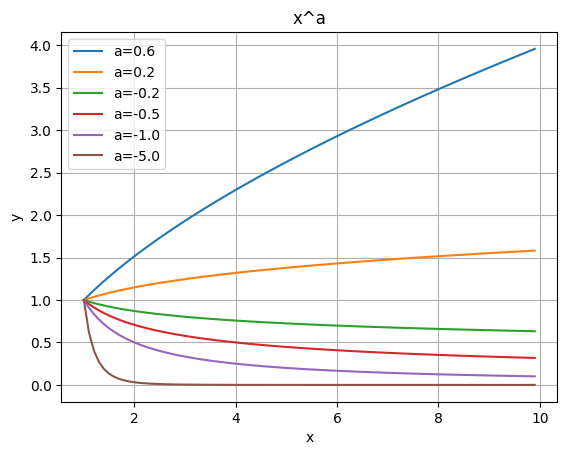

In [3]:
def func(x, a):
    return x**a


x = np.arange(1, 10, 1e-1)

plt.plot(x, func(x, 0.6), label='a=0.6')
plt.plot(x, func(x, 0.2), label='a=0.2')
plt.plot(x, func(x, -0.2), label='a=-0.2')
plt.plot(x, func(x, -0.5), label='a=-0.5')
plt.plot(x, func(x, -1.0), label='a=-1.0')
plt.plot(x, func(x, -5.0), label='a=-5.0')
plt.title('x^a')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

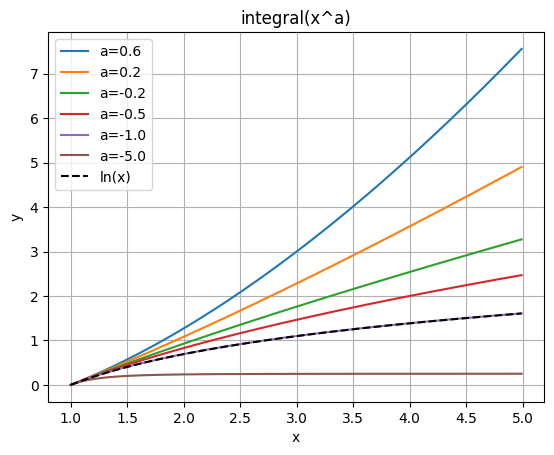

In [4]:
def integrate(func, x, *args):
    y = func(x, *args)
    dx = x[1] - x[0]
    mid_y = (y[1:] + y[:-1])/2
    return dx * np.sum(mid_y)


def integralx(integrate_func, x, *args, **kwargs):
    b_s = kwargs.get('step_size', 1e-3)
    b_start = x[0] - 2*b_s
    y = np.zeros_like(x)
    for i, x_ in enumerate(x):
        b = np.arange(b_start, x_, b_s)
        y[i] = integrate(integrate_func, b, *args)
    return y

x = np.arange(1, 5, 1e-2)

y = integralx(func, x, 0.6)
plt.plot(x, y, label='a=0.6')

y = integralx(func, x, 0.2)
plt.plot(x, y, label='a=0.2')

y = integralx(func, x, -0.2)
plt.plot(x, y, label='a=-0.2')

y = integralx(func, x, -0.5)
plt.plot(x, y, label='a=-0.5')

y = integralx(func, x, -1.0)
plt.plot(x, y, label='a=-1.0')

y = integralx(func, x, -5.0)
plt.plot(x, y, label='a=-5.0')

y = np.log(x)
plt.plot(x, y, label='ln(x)', linestyle='--', color='black')
plt.title('integral(x^a)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

integral{cos(x^3)}

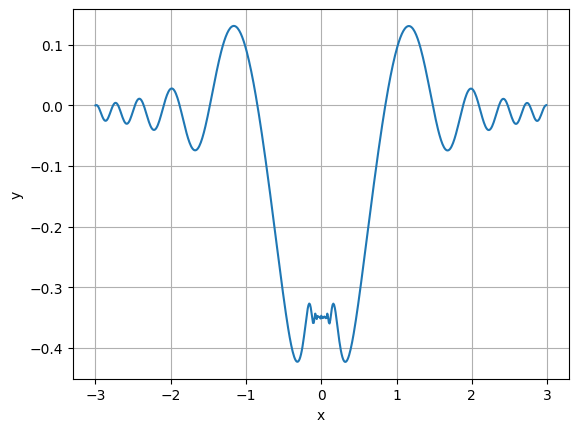

In [6]:
# Example 2

def func(x):
    return np.cos(x**3) * np.sin(1/x)

x = np.arange(-3, 3, 1e-2)

y = integralx(func, x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Differencial Equation 

In [10]:
from scipy.integrate import odeint

Position-time equation

In [7]:
def velocity_time(x, t):
    return -9.8

In [8]:
time = np.arange(0, 10, 1e-3)

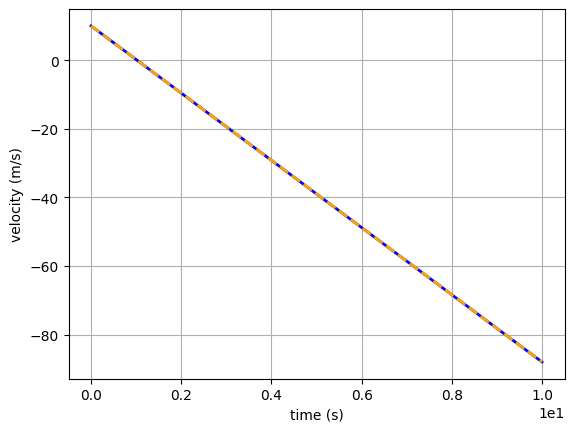

In [14]:
v0 = 10

v = odeint(velocity_time, [v0], time)

plt.plot(time, v, 'blue', linewidth = 2)
plt.plot(time, -9.8*time + v0, 'orange', linewidth = 2, linestyle='--')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.show()

In [15]:
def position_time(x, t):
    return -9.8*t + v0

In [16]:
time = np.arange(0, 10, 1e-3)

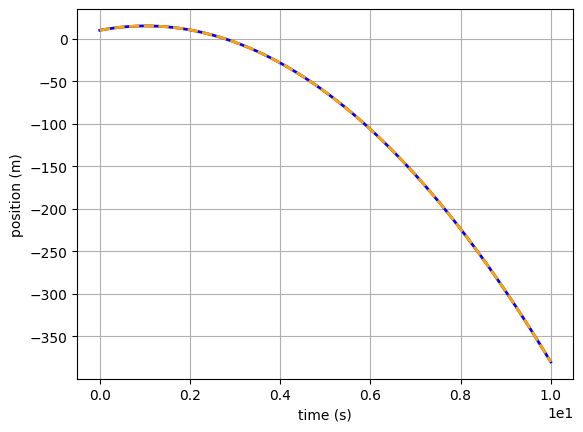

In [17]:
x0 = 10
v0 = 10

x = odeint(position_time, [x0], time)

plt.plot(time, x, 'blue', linewidth = 2)
plt.plot(time, -0.5*9.8*time*time + v0*time + x0, 'orange', linewidth = 2, linestyle='--')
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.show()

Rocket equation:

mz" = f(t) - b(z)*z' - c(z)*z'^2 - g(z)

In [36]:
R = 6400000 # radius of Earth
m = 18000 # kg
g = 9.81 # m/s^2
b = 1.0e4 # kg/s drag coefficient, linear
c = 1.0e2 # kg/m drag coefficient, non-linear
f = 10.00e5 # thrust kg.m/s^2
y0 = 10.0 # initial height
v0 = -5.0 # initial velocity

def b_(x):
    return np.maximum(b - 20.0*x, 0)

def c_(x):
    return np.maximum(c - 10.0*x, 0)

def g_(x):
    r_ = x + R
    return g*R*R/(r_*r_)

def f_(t):
    return np.where(t < 30, f, 0) #*np.maximum(5 - (t-3)*(t-3), 0)

In [37]:
def rocket_equation(x, t):
    return [x[1], (f_(t)/m - (b_(x[0])/m)*x[1]  - (c_(x[0])/m)*x[1]**2 - g_(x[0]))]

In [40]:
time = np.arange(0, 50, 1e-2)

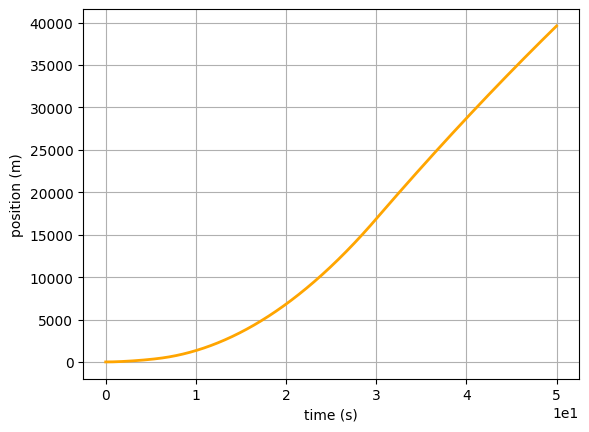

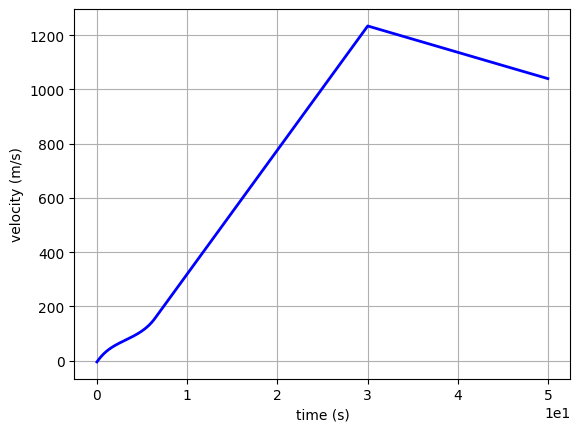

In [41]:
result = odeint(rocket_equation, [y0, v0], time)
position, velocity = result[:, 0], result[:, 1]

plt.plot(time, position, 'orange', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.show()

plt.plot(time, velocity, 'blue', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.show()

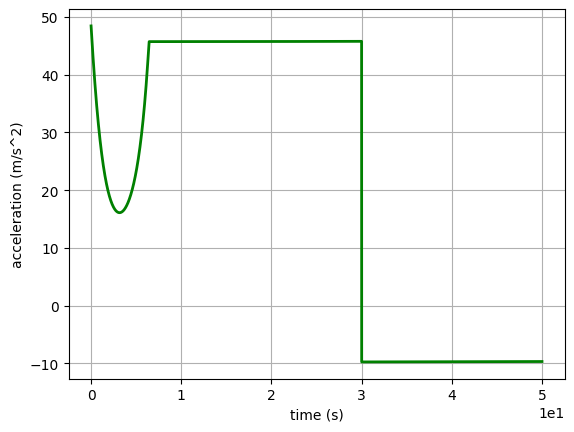

In [42]:
_, a = rocket_equation([position, velocity], time)

plt.plot(time, a, 'green', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
#plt.axis((0, 3, -3, 4))

## Damped Oscillator Example

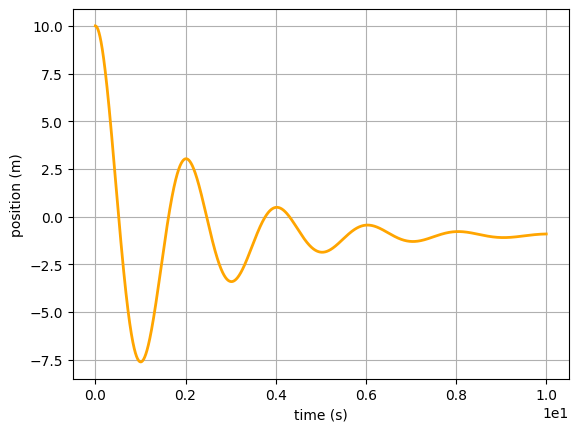

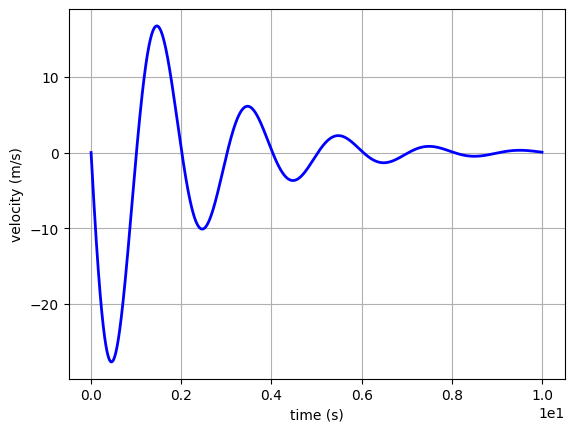

In [47]:
g = 9.8
m = 1.0
k = 10.0
y0 = 10.0
v0 = 0.0
b = 1.0


def f_(y, t):
    return -k*y


def spring_equation(x, t):
    return [x[1], (f_(x[0], t)/m - (b/m)*x[1] - g)]


time = np.arange(0, 10.0, 1e-3)

result = odeint(spring_equation, [y0, v0], time)
position, velocity = result[:, 0], result[:, 1]


plt.plot(time, position, 'orange', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.show()

plt.plot(time, velocity, 'blue', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.show()